In [4]:
import os 
import shutil
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [5]:
%%time
df = pd.read_csv("C:/Users/bobbr/OneDrive/Documents/The Plan/NFL/2023/Modelling/def_team_data.csv")


df = df.fillna(0)
#df['FantasyPoints'] = (-df['Fumbles FL']*1 + df['Rushing Yds']*0.1 + df['Rushing TD']*6+df['Scoring 2PM']*2
#                      + df['Receiving Rec']*1 + df['Receiving Yds']*0.1 + df['Receiving TD']*6) 
df['FantasyPoints'] = df['FPts']
df = df[df['FantasyPoints'] <= 30]

CPU times: total: 1.44 s
Wall time: 1.55 s


In [9]:
df.head()

index  Unnamed: 0  Week  FPts  week_num  year  Opp team_wk_year  \
0      0           0     1  20.0         1  2015  LAR   SEA 1 2015   
1      1           1     1  17.0         1  2015  JAX   CAR 1 2015   
2      2           2     1  14.0         1  2015  SEA   LAR 1 2015   
3      3           3     1  14.0         1  2015   TB   TEN 1 2015   
4      4           4     1  14.0         1  2015  LAC   DET 1 2015   

  opp_wk_year team_wk_year 1 wks ago team_wk_year 2 wks ago  \
0  LAR 1 2015            SEA 17 2014            SEA 16 2014   
1  JAX 1 2015            CAR 17 2014            CAR 16 2014   
2  SEA 1 2015            LAR 17 2014            LAR 16 2014   
3   TB 1 2015            TEN 17 2014            TEN 16 2014   
4  LAC 1 2015            DET 17 2014            DET 16 2014   

  team_wk_year 3 wks ago team_wk_year 4 wks ago team_wk_year 5 wks ago  \
0            SEA 15 2014            SEA 14 2014            SEA 13 2014   
1            CAR 15 2014            CAR 14 2014            CAR 13 2014   
2            LAR 15 2014            LAR 14 2014            LAR 13 2014   
3            TEN 15 2014            TEN 14 2014            TEN 13 2014   
4            DET 15 2014            DET 14 2014            DET 13 2014   

  team_wk_year 6 wks ago team_wk_year 7 wks ago team_wk_year 8 wks ago  \
0            SEA 12 2014            SEA 11 2014            SEA 10 2014   
1            CAR 12 2014            CAR 11 2014            CAR 10 2014   
2            LAR 12 2014            LAR 11 2014            LAR 10 2014   
3            TEN 12 2014            TEN 11 2014            TEN 10 2014   
4            DET 12 2014            DET 11 2014            DET 10 2014   

  team_wk_year 9 wks ago team_wk_year 10 wks ago team_wk_year 11 wks ago  \
0             SEA 9 2014              SEA 8 2014              SEA 7 2014   
1             CAR 9 2014              CAR 8 2014              CAR 7 2014   
2             LAR 9 2014              LAR 8 2014              LAR 7 2014   
3             TEN 9 2014              TEN 8 2014              TEN 7 2014   
4             DET 9 2014              DET 8 2014              DET 7 2014   

  team_wk_year 12 wks ago team_wk_year 13 wks ago team_wk_year 14 wks ago  \
0              SEA 6 2014              SEA 5 2014              SEA 4 2014   
1              CAR 6 2014              CAR 5 2014              CAR 4 2014   
2              LAR 6 2014              LAR 5 2014              LAR 4 2014   
3              TEN 6 2014              TEN 5 2014              TEN 4 2014   
4              DET 6 2014              DET 5 2014              DET 4 2014   

  team_wk_year 15 wks ago team_wk_year 16 wks ago team_wk_year 17 wks ago  \
0              SEA 3 2014              SEA 2 2014              SEA 1 2014   
1              CAR 3 2014              CAR 2 2014              CAR 1 2014   
2              LAR 3 2014              LAR 2 2014              LAR 1 2014   
3              TEN 3 2014              TEN 2 2014              TEN 1 2014   
4              DET 3 2014              DET 2 2014              DET 1 2014   

  team_wk_year 18 wks ago team_wk_year 19 wks ago team_wk_year 20 wks ago  \
0             SEA 17 2013             SEA 16 2013             SEA 15 2013   
1             CAR 17 2013             CAR 16 2013             CAR 15 2013   
2             LAR 17 2013             LAR 16 2013             LAR 15 2013   
3             TEN 17 2013             TEN 16 2013             TEN 15 2013   
4             DET 17 2013             DET 16 2013             DET 15 2013   

  team_wk_year 21 wks ago team_wk_year 22 wks ago team_wk_year 23 wks ago  \
0             SEA 14 2013             SEA 13 2013             SEA 12 2013   
1             CAR 14 2013             CAR 13 2013             CAR 12 2013   
2             LAR 14 2013             LAR 13 2013             LAR 12 2013   
3             TEN 14 2013             TEN 13 2013             TEN 12 2013   
4             DET 14 2013             DET 13 2013             DET 12 2013   

  te

In [3]:
#df = df[~df['team_wk_year'].str.contains('12 2022')]

In [6]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.fillna(0)

In [7]:
df = df.reset_index()


<Axes: xlabel='FantasyPoints', ylabel='Density'>

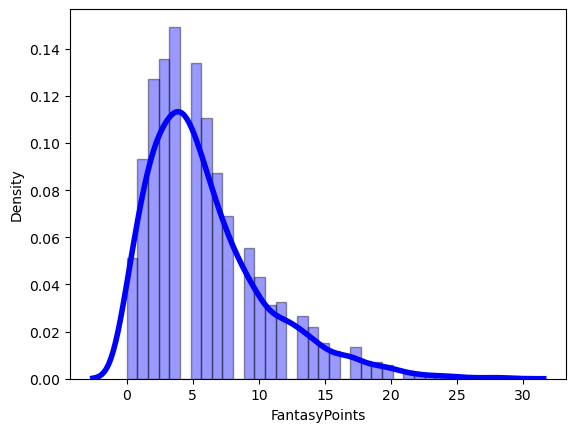

In [8]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
#plt.hist(df['FantasyPoints'], color = 'blue', edgecolor = 'black',
#         bins = int(180/5))

# seaborn histogram
sns.distplot(df['FantasyPoints'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'},
            kde_kws = {'linewidth':4})
# Add labels
##plt.title('Histogram of Fantasy Points')
#plt.xlabel('FantasyPoints')
#plt.ylabel('Count')

In [10]:

df = df.drop(columns = ['index',
    'Unnamed: 0',
                       'Opp', 'FPts',
#'team_wk_year',
'opp_wk_year',
'team_wk_year 1 wks ago',
'team_wk_year 2 wks ago',
'team_wk_year 3 wks ago',
'team_wk_year 4 wks ago',
'team_wk_year 5 wks ago',
'team_wk_year 6 wks ago',
'team_wk_year 7 wks ago',
'team_wk_year 8 wks ago',
'team_wk_year 9 wks ago',
'team_wk_year 10 wks ago',
'team_wk_year 11 wks ago',
'team_wk_year 12 wks ago',
'team_wk_year 13 wks ago',
'team_wk_year 14 wks ago',
'team_wk_year 15 wks ago',
'team_wk_year 16 wks ago',
'team_wk_year 17 wks ago',
'team_wk_year 18 wks ago',
'team_wk_year 19 wks ago',
'team_wk_year 20 wks ago',
'team_wk_year 21 wks ago',
'team_wk_year 22 wks ago',
'team_wk_year 23 wks ago',
'team_wk_year 24 wks ago',
'team_wk_year 25 wks ago',
'team_wk_year 26 wks ago',
'team_wk_year 27 wks ago',
'team_wk_year 28 wks ago',
'team_wk_year 29 wks ago',
'team_wk_year 30 wks ago',
'team_wk_year 31 wks ago',
'team_wk_year 32 wks ago',
'team_wk_year 33 wks ago',
'team_wk_year 34 wks ago',
'team_wk_year 35 wks ago',
'def matchup Opp 1wks ago',
'def matchup team_wk_year 1wks ago',
'def matchup opp_wk_year 1wks ago',
'def matchup Opp 2wks ago',
'def matchup team_wk_year 2wks ago',
'def matchup opp_wk_year 2wks ago',
'def matchup Opp 3wks ago',
'def matchup team_wk_year 3wks ago',
'def matchup opp_wk_year 3wks ago',
'def matchup Opp 4wks ago',
'def matchup team_wk_year 4wks ago',
'def matchup opp_wk_year 4wks ago',
'def matchup Opp 5wks ago',
'def matchup team_wk_year 5wks ago',
'def matchup opp_wk_year 5wks ago',
'def matchup Opp 6wks ago',
'def matchup team_wk_year 6wks ago',
'def matchup opp_wk_year 6wks ago',
'def matchup Opp 7wks ago',
'def matchup team_wk_year 7wks ago',
'def matchup opp_wk_year 7wks ago',
'def matchup Opp 8wks ago',
'def matchup team_wk_year 8wks ago',
'def matchup opp_wk_year 8wks ago',
'def matchup Opp 9wks ago',
'def matchup team_wk_year 9wks ago',
'def matchup opp_wk_year 9wks ago',
'def matchup Opp 10wks ago',
'def matchup team_wk_year 10wks ago',
'def matchup opp_wk_year 10wks ago',
'def matchup Opp 11wks ago',
'def matchup team_wk_year 11wks ago',
'def matchup opp_wk_year 11wks ago',
'def matchup Opp 12wks ago',
'def matchup team_wk_year 12wks ago',
'def matchup opp_wk_year 12wks ago',
'def matchup Opp 13wks ago',
'def matchup team_wk_year 13wks ago',
'def matchup opp_wk_year 13wks ago',
'def matchup Opp 14wks ago',
'def matchup team_wk_year 14wks ago',
'def matchup opp_wk_year 14wks ago',
'def matchup Opp 15wks ago',
'def matchup team_wk_year 15wks ago',
'def matchup opp_wk_year 15wks ago',
'def matchup Opp 16wks ago',
'def matchup team_wk_year 16wks ago',
'def matchup opp_wk_year 16wks ago',
'def matchup Opp 17wks ago',
'def matchup team_wk_year 17wks ago',
'def matchup opp_wk_year 17wks ago',
'def matchup Opp 18wks ago',
'def matchup team_wk_year 18wks ago',
'def matchup opp_wk_year 18wks ago',
'def matchup Opp 19wks ago',
'def matchup team_wk_year 19wks ago',
'def matchup opp_wk_year 19wks ago',
'def matchup Opp 20wks ago',
'def matchup team_wk_year 20wks ago',
'def matchup opp_wk_year 20wks ago',
'def matchup Opp 21wks ago',
'def matchup team_wk_year 21wks ago',
'def matchup opp_wk_year 21wks ago',
'def matchup Opp 22wks ago',
'def matchup team_wk_year 22wks ago',
'def matchup opp_wk_year 22wks ago',
'def matchup Opp 23wks ago',
'def matchup team_wk_year 23wks ago',
'def matchup opp_wk_year 23wks ago',
'def matchup Opp 24wks ago',
'def matchup team_wk_year 24wks ago',
'def matchup opp_wk_year 24wks ago',
'def matchup Opp 25wks ago',
'def matchup team_wk_year 25wks ago',
'def matchup opp_wk_year 25wks ago',
'def matchup Opp 26wks ago',
'def matchup team_wk_year 26wks ago',
'def matchup opp_wk_year 26wks ago',
'def matchup Opp 27wks ago',
'def matchup team_wk_year 27wks ago',
'def matchup opp_wk_year 27wks ago',
'def matchup Opp 28wks ago',
'def matchup team_wk_year 28wks ago',
'def matchup opp_wk_year 28wks ago',
'def matchup Opp 29wks ago',
'def matchup team_wk_year 29wks ago',
'def matchup opp_wk_year 29wks ago',
'def matchup Opp 30wks ago',
'def matchup team_wk_year 30wks ago',
'def matchup opp_wk_year 30wks ago',
'def matchup Opp 31wks ago',
'def matchup team_wk_year 31wks ago',
'def matchup opp_wk_year 31wks ago',
'def matchup Opp 32wks ago',
'def matchup team_wk_year 32wks ago',
'def matchup opp_wk_year 32wks ago',
'def matchup Opp 33wks ago',
'def matchup team_wk_year 33wks ago',
'def matchup opp_wk_year 33wks ago',
'def matchup Opp 34wks ago',
'def matchup team_wk_year 34wks ago',
'def matchup opp_wk_year 34wks ago',
'def matchup Opp 35wks ago',
'def matchup team_wk_year 35wks ago',
'def matchup opp_wk_year 35wks ago',
'opp_wk_year 1 wks ago',
'opp_wk_year 2 wks ago',
'opp_wk_year 3 wks ago',
'opp_wk_year 4 wks ago',
'opp_wk_year 5 wks ago',
'opp_wk_year 6 wks ago',
'opp_wk_year 7 wks ago',
'opp_wk_year 8 wks ago',
'opp_wk_year 9 wks ago',
'opp_wk_year 10 wks ago',
'opp_wk_year 11 wks ago',
'opp_wk_year 12 wks ago',
'opp_wk_year 13 wks ago',
'opp_wk_year 14 wks ago',
'opp_wk_year 15 wks ago',
'opp_wk_year 16 wks ago',
'opp_wk_year 17 wks ago',
'opp_wk_year 18 wks ago',
'opp_wk_year 19 wks ago',
'opp_wk_year 20 wks ago',
'opp_wk_year 21 wks ago',
'opp_wk_year 22 wks ago',
'opp_wk_year 23 wks ago',
'opp_wk_year 24 wks ago',
'opp_wk_year 25 wks ago',
'opp_wk_year 26 wks ago',
'opp_wk_year 27 wks ago',
'opp_wk_year 28 wks ago',
'opp_wk_year 29 wks ago',
'opp_wk_year 30 wks ago',
'opp_wk_year 31 wks ago',
'opp_wk_year 32 wks ago',
'opp_wk_year 33 wks ago',
'opp_wk_year 34 wks ago',
'opp_wk_year 35 wks ago',
'opp matchup CITY 1wks ago',
'opp matchup team_wk_year 1wks ago',
'opp matchup opp_wk_year 1wks ago',
'opp matchup CITY 2wks ago',
'opp matchup team_wk_year 2wks ago',
'opp matchup opp_wk_year 2wks ago',
'opp matchup CITY 3wks ago',
'opp matchup team_wk_year 3wks ago',
'opp matchup opp_wk_year 3wks ago',
'opp matchup CITY 4wks ago',
'opp matchup team_wk_year 4wks ago',
'opp matchup opp_wk_year 4wks ago',
'opp matchup CITY 5wks ago',
'opp matchup team_wk_year 5wks ago',
'opp matchup opp_wk_year 5wks ago',
'opp matchup CITY 6wks ago',
'opp matchup team_wk_year 6wks ago',
'opp matchup opp_wk_year 6wks ago',
'opp matchup CITY 7wks ago',
'opp matchup team_wk_year 7wks ago',
'opp matchup opp_wk_year 7wks ago',
'opp matchup CITY 8wks ago',
'opp matchup team_wk_year 8wks ago',
'opp matchup opp_wk_year 8wks ago',
'opp matchup CITY 9wks ago',
'opp matchup team_wk_year 9wks ago',
'opp matchup opp_wk_year 9wks ago',
'opp matchup CITY 10wks ago',
'opp matchup team_wk_year 10wks ago',
'opp matchup opp_wk_year 10wks ago',
'opp matchup CITY 11wks ago',
'opp matchup team_wk_year 11wks ago',
'opp matchup opp_wk_year 11wks ago',
'opp matchup CITY 12wks ago',
'opp matchup team_wk_year 12wks ago',
'opp matchup opp_wk_year 12wks ago',
'opp matchup CITY 13wks ago',
'opp matchup team_wk_year 13wks ago',
'opp matchup opp_wk_year 13wks ago',
'opp matchup CITY 14wks ago',
'opp matchup team_wk_year 14wks ago',
'opp matchup opp_wk_year 14wks ago',
'opp matchup CITY 15wks ago',
'opp matchup team_wk_year 15wks ago',
'opp matchup opp_wk_year 15wks ago',
'opp matchup CITY 16wks ago',
'opp matchup team_wk_year 16wks ago',
'opp matchup opp_wk_year 16wks ago',
'opp matchup CITY 17wks ago',
'opp matchup team_wk_year 17wks ago',
'opp matchup opp_wk_year 17wks ago',
'opp matchup CITY 18wks ago',
'opp matchup team_wk_year 18wks ago',
'opp matchup opp_wk_year 18wks ago',
'opp matchup CITY 19wks ago',
'opp matchup team_wk_year 19wks ago',
'opp matchup opp_wk_year 19wks ago',
'opp matchup CITY 20wks ago',
'opp matchup team_wk_year 20wks ago',
'opp matchup opp_wk_year 20wks ago',
'opp matchup CITY 21wks ago',
'opp matchup team_wk_year 21wks ago',
'opp matchup opp_wk_year 21wks ago',
'opp matchup CITY 22wks ago',
'opp matchup team_wk_year 22wks ago',
'opp matchup opp_wk_year 22wks ago',
'opp matchup CITY 23wks ago',
'opp matchup team_wk_year 23wks ago',
'opp matchup opp_wk_year 23wks ago',
'opp matchup CITY 24wks ago',
'opp matchup team_wk_year 24wks ago',
'opp matchup opp_wk_year 24wks ago',
'opp matchup CITY 25wks ago',
'opp matchup team_wk_year 25wks ago',
'opp matchup opp_wk_year 25wks ago',
'opp matchup CITY 26wks ago',
'opp matchup team_wk_year 26wks ago',
'opp matchup opp_wk_year 26wks ago',
'opp matchup CITY 27wks ago',
'opp matchup team_wk_year 27wks ago',
'opp matchup opp_wk_year 27wks ago',
'opp matchup CITY 28wks ago',
'opp matchup team_wk_year 28wks ago',
'opp matchup opp_wk_year 28wks ago',
'opp matchup CITY 29wks ago',
'opp matchup team_wk_year 29wks ago',
'opp matchup opp_wk_year 29wks ago',
'opp matchup CITY 30wks ago',
'opp matchup team_wk_year 30wks ago',
'opp matchup opp_wk_year 30wks ago',
'opp matchup CITY 31wks ago',
'opp matchup team_wk_year 31wks ago',
'opp matchup opp_wk_year 31wks ago',
'opp matchup CITY 32wks ago',
'opp matchup opp_wk_year 32wks ago',
'opp matchup CITY 33wks ago',
'opp matchup team_wk_year 33wks ago',
'opp matchup opp_wk_year 33wks ago',
'opp matchup CITY 34wks ago',
'opp matchup team_wk_year 34wks ago',
'opp matchup opp_wk_year 34wks ago',
'opp matchup CITY 35wks ago',
'opp matchup team_wk_year 35wks ago',
'opp matchup opp_wk_year 35wks ago',
                        'opp matchup team_wk_year 32wks ago',
'sum def matchup Opp 2wk trend',
'avg def matchup Opp 2wk trend',
'min def matchup Opp 2wk trend',
'max def matchup Opp 2wk trend',
'sum def matchup Opp 3wk trend',
'avg def matchup Opp 3wk trend',
'min def matchup Opp 3wk trend',
'max def matchup Opp 3wk trend',
'sum def matchup Opp 4wk trend',
'avg def matchup Opp 4wk trend',
'min def matchup Opp 4wk trend',
'max def matchup Opp 4wk trend',
'sum def matchup Opp 5wk trend',
'avg def matchup Opp 5wk trend',
'min def matchup Opp 5wk trend',
'max def matchup Opp 5wk trend',
'sum def matchup Opp 6wk trend',
'avg def matchup Opp 6wk trend',
'min def matchup Opp 6wk trend',
'max def matchup Opp 6wk trend',
'sum def matchup Opp 9wk trend',
'avg def matchup Opp 9wk trend',
'min def matchup Opp 9wk trend',
'max def matchup Opp 9wk trend',
'sum def matchup Opp 12wk trend',
'avg def matchup Opp 12wk trend',
'min def matchup Opp 12wk trend',
'max def matchup Opp 12wk trend',
'sum def matchup Opp 15wk trend',
'avg def matchup Opp 15wk trend',
'min def matchup Opp 15wk trend',
'max def matchup Opp 15wk trend',
'sum def matchup Opp 18wk trend',
'avg def matchup Opp 18wk trend',
'min def matchup Opp 18wk trend',
'max def matchup Opp 18wk trend',
'sum def matchup Opp 24wk trend',
'avg def matchup Opp 24wk trend',
'min def matchup Opp 24wk trend',
'max def matchup Opp 24wk trend',
'sum def matchup Opp 30wk trend',
'avg def matchup Opp 30wk trend',
'min def matchup Opp 30wk trend',
'max def matchup Opp 30wk trend',
                       'def matchup FPts 1wks ago',
'def matchup FPts 2wks ago',
'def matchup FPts 3wks ago',
'def matchup FPts 4wks ago',
'def matchup FPts 5wks ago',
'def matchup FPts 6wks ago',
'def matchup FPts 7wks ago',
'def matchup FPts 8wks ago',
'def matchup FPts 9wks ago',
'def matchup FPts 10wks ago',
'def matchup FPts 11wks ago',
'def matchup FPts 12wks ago',
'def matchup FPts 13wks ago',
'def matchup FPts 14wks ago',
'def matchup FPts 15wks ago',
'def matchup FPts 16wks ago',
'def matchup FPts 17wks ago',
'def matchup FPts 18wks ago',
'def matchup FPts 19wks ago',
'def matchup FPts 20wks ago',
'def matchup FPts 21wks ago',
'def matchup FPts 22wks ago',
'def matchup FPts 23wks ago',
'def matchup FPts 24wks ago',
'def matchup FPts 25wks ago',
'def matchup FPts 26wks ago',
'def matchup FPts 27wks ago',
'def matchup FPts 28wks ago',
'def matchup FPts 29wks ago',
'def matchup FPts 30wks ago',
'def matchup FPts 31wks ago',
'def matchup FPts 32wks ago',
'def matchup FPts 33wks ago',
'def matchup FPts 34wks ago',
'def matchup FPts 35wks ago',
'opp matchup FPts 1wks ago',
'opp matchup FPts 2wks ago',
'opp matchup FPts 3wks ago',
'opp matchup FPts 4wks ago',
'opp matchup FPts 5wks ago',
'opp matchup FPts 6wks ago',
'opp matchup FPts 7wks ago',
'opp matchup FPts 8wks ago',
'opp matchup FPts 9wks ago',
'opp matchup FPts 10wks ago',
'opp matchup FPts 11wks ago',
'opp matchup FPts 12wks ago',
'opp matchup FPts 13wks ago',
'opp matchup FPts 14wks ago',
'opp matchup FPts 15wks ago',
'opp matchup FPts 16wks ago',
'opp matchup FPts 17wks ago',
'opp matchup FPts 18wks ago',
'opp matchup FPts 19wks ago',
'opp matchup FPts 20wks ago',
'opp matchup FPts 21wks ago',
'opp matchup FPts 22wks ago',
'opp matchup FPts 23wks ago',
'opp matchup FPts 24wks ago',
'opp matchup FPts 25wks ago',
'opp matchup FPts 26wks ago',
'opp matchup FPts 27wks ago',
'opp matchup FPts 28wks ago',
'opp matchup FPts 29wks ago',
'opp matchup FPts 30wks ago',
'opp matchup FPts 31wks ago',
'opp matchup FPts 32wks ago',
'opp matchup FPts 33wks ago',
'opp matchup FPts 34wks ago',
'opp matchup FPts 35wks ago',
'sum opp matchup FPts 2wk trend',
'avg opp matchup FPts 2wk trend',
'min opp matchup FPts 2wk trend',
'max opp matchup FPts 2wk trend',
'sum opp matchup FPts 3wk trend',
'avg opp matchup FPts 3wk trend',
'min opp matchup FPts 3wk trend',
'max opp matchup FPts 3wk trend',
'sum opp matchup FPts 4wk trend',
'avg opp matchup FPts 4wk trend',
'min opp matchup FPts 4wk trend',
'max opp matchup FPts 4wk trend',
'sum opp matchup FPts 5wk trend',
'avg opp matchup FPts 5wk trend',
'min opp matchup FPts 5wk trend',
'max opp matchup FPts 5wk trend',
'sum opp matchup FPts 6wk trend',
'avg opp matchup FPts 6wk trend',
'min opp matchup FPts 6wk trend',
'max opp matchup FPts 6wk trend',
'sum opp matchup FPts 9wk trend',
'avg opp matchup FPts 9wk trend',
'min opp matchup FPts 9wk trend',
'max opp matchup FPts 9wk trend',
'sum opp matchup FPts 12wk trend',
'avg opp matchup FPts 12wk trend',
'min opp matchup FPts 12wk trend',
'max opp matchup FPts 12wk trend',
'sum opp matchup FPts 15wk trend',
'avg opp matchup FPts 15wk trend',
'min opp matchup FPts 15wk trend',
'max opp matchup FPts 15wk trend',
'sum opp matchup FPts 18wk trend',
'avg opp matchup FPts 18wk trend',
'min opp matchup FPts 18wk trend',
'max opp matchup FPts 18wk trend',
'sum opp matchup FPts 24wk trend',
'avg opp matchup FPts 24wk trend',
'min opp matchup FPts 24wk trend',
'max opp matchup FPts 24wk trend',
'sum opp matchup FPts 30wk trend',
'avg opp matchup FPts 30wk trend',
'min opp matchup FPts 30wk trend',
'max opp matchup FPts 30wk trend',
'sum def matchup FPts 2wk trend',
'avg def matchup FPts 2wk trend',
'min def matchup FPts 2wk trend',
'max def matchup FPts 2wk trend',
'sum def matchup FPts 3wk trend',
'avg def matchup FPts 3wk trend',
'min def matchup FPts 3wk trend',
'max def matchup FPts 3wk trend',
'sum def matchup FPts 4wk trend',
'avg def matchup FPts 4wk trend',
'min def matchup FPts 4wk trend',
'max def matchup FPts 4wk trend',
'sum def matchup FPts 5wk trend',
'avg def matchup FPts 5wk trend',
'min def matchup FPts 5wk trend',
'max def matchup FPts 5wk trend',
'sum def matchup FPts 6wk trend',
'avg def matchup FPts 6wk trend',
'min def matchup FPts 6wk trend',
'max def matchup FPts 6wk trend',
'sum def matchup FPts 9wk trend',
'avg def matchup FPts 9wk trend',
'min def matchup FPts 9wk trend',
'max def matchup FPts 9wk trend',
'sum def matchup FPts 12wk trend',
'avg def matchup FPts 12wk trend',
'min def matchup FPts 12wk trend',
'max def matchup FPts 12wk trend',
'sum def matchup FPts 15wk trend',
'avg def matchup FPts 15wk trend',
'min def matchup FPts 15wk trend',
'max def matchup FPts 15wk trend',
'sum def matchup FPts 18wk trend',
'avg def matchup FPts 18wk trend',
'min def matchup FPts 18wk trend',
'max def matchup FPts 18wk trend',
'sum def matchup FPts 24wk trend',
'avg def matchup FPts 24wk trend',
'min def matchup FPts 24wk trend',
'max def matchup FPts 24wk trend',
'sum def matchup FPts 30wk trend',
'avg def matchup FPts 30wk trend',
'min def matchup FPts 30wk trend',
'max def matchup FPts 30wk trend',
                       'Week','week_num']

)

In [11]:
df = shuffle(df, random_state = 0)
#df_oob = df[df['Year'] == 2021]
#df = df[df['Year'] != 2021]
#df = df.drop(columns = ['Year'])
#df_oob = df_oob.drop(columns = ['Year'])

#print(df_oob.shape, df.shape)

In [12]:
# Importing the libraries
#import pyspark.sql.functions as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import joblib
import shutil
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 300)

from sklearn.model_selection import GridSearchCV
#from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import plot_importance
import sklearn.metrics as sklmetrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn import metrics

from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import optuna

In [13]:
### split data into X and y
X = df.drop(columns = ['FantasyPoints'])
#X = X.fillna(0)
Y = df[['FantasyPoints']]
Y = Y.fillna(0)
Y = Y.rename(columns = {'FantasyPoints':'y'})

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)


In [14]:
from sklearn.preprocessing import StandardScaler
#model = XGBClassifier()
scaler = StandardScaler()
#x_trainScaled = scaler.fit_transform(_Xtrain)
#model.fit(x_trainScaled, y_train)

In [15]:
X_train_id = X_train[['team_wk_year']]
X_train = X_train.drop(columns = 'team_wk_year')
X_train = X_train.fillna(0)
#X_train = scaler.fit_transform(X_train)

y_train = y_train.fillna(0)
#y_train  = scaler.fit_transform(y_train)

y_test = y_test.fillna(0)
#y_test = scaler.fit_transform(y_test)

X_test_id = X_test[['team_wk_year']]
X_test = X_test.drop(columns = 'team_wk_year')
X_test = X_test.fillna(0)
#X_test = scaler.fit_transform(X_test)

#X_oob = df_oob.drop(columns = ['FantasyPoints','player_wk_year'])
#X_oob = X_oob.fillna(0)
#X_oob = scaler.fit_transform(X_oob)

#y_oob = df_oob[['FantasyPoints']]
#y_oob = y_oob.fillna(0)
#y_oob = y_oob.rename(columns = {'FantasyPoints':'y'})


#oob_id = df_oob[['FantasyPoints','player_wk_year']]


In [16]:
# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
 
# Train and test set are converted to DMatrix objects,
# as it is required by learning API.
train_dmatrix = xg.DMatrix(data = X_train, label = y_train)
test_dmatrix = xg.DMatrix(data = X_test, label = y_test)
 
# Parameter dictionary specifying base learner
param = {"booster":"gblinear", "objective":"reg:linear"}
 
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = xgb_r.predict(test_dmatrix)
 
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

[18:17:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  4.804610


In [17]:
if X.shape[0] != Y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

In [18]:
def objective(trial):
    #(data, target) = sklearn.datasets.load_breast_cancer(return_X_y=True)
    #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
    dtrain = xg.DMatrix(X_train, label=y_train)
    dvalid = xg.DMatrix(X_test, label=y_test)

    param = {
        "verbosity": 0,
        "objective": "reg:squarederror",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    bst = xg.train(param, dtrain)
    preds = bst.predict(dvalid)
    rmse = np.sqrt(MSE(y_test, preds))
    print("RMSE : % f" %(rmse))
    return rmse

if __name__ == "__main__":
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=10, timeout=600)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
        
        
#optuna.visualization.plot_optimization_history(study)
#optuna.visualization.plot_parallel_coordinate(study)
#optuna.visualization.plot_slice(study)
#optuna.visualization.plot_param_importances(study)
  
  
booster = trial.params['booster']
 
if (booster == 'gblinear'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample}
  
elif(booster == 'gbtree'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree'] 
  max_depth = trial.params['max_depth']
  min_child_weight = trial.params['min_child_weight']
  eta = trial.params['eta']
  gamma = trial.params['gamma']
  grow_policy = trial.params['grow_policy']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample,
      'colsample_bytree': colsample_bytree,
      'max_depth': max_depth,
      'min_child_weight': min_child_weight,
      'eta': eta,
      'gamma': gamma,
      'grow_policy': grow_policy#,
     # 'n_estimators': n_estimators
  }
  
elif (booster == 'dart'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree'] 
  max_depth = trial.params['max_depth']
  min_child_weight = trial.params['min_child_weight']
  eta = trial.params['eta']
  gamma = trial.params['gamma']
  grow_policy = trial.params['grow_policy']
  sample_type = trial.params['sample_type']
  normalize_type = trial.params['normalize_type']
  rate_drop = trial.params['rate_drop']
  skip_drop = trial.params['skip_drop']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample,
      'colsample_bytree': colsample_bytree,
      'max_depth': max_depth,
      'min_child_weight': min_child_weight,
      'eta': eta,
      'gamma': gamma,
      'grow_policy': grow_policy,
      'sample_type':sample_type,
      'normalize_type':normalize_type,
      'rate_drop':rate_drop,
      'skip_drop':skip_drop
     # 'n_estimators': n_estimators
  }
  
 
#lambda_ = trial.params['lambda']
#alpha = trial.params['alpha']
#subsample = trial.params['subsample']
#colsample_bytree = trial.params['colsample_bytree']
#max_depth = trial.params['max_depth']
#min_child_weight = trial.params['min_child_weight']
#eta = trial.params['eta']
#gamma = trial.params['gamma']
#grow_policy = trial.params['grow_policy']
#n_estimators = trial.user_attrs['n_estimators']
  

#params = {
#      'booster': booster,
#      'lambda': lambda_,
#      'alpha': alpha,
#      'subsample': subsample,
#      'colsample_bytree': colsample_bytree,
   #   'max_depth': max_depth,
#      'min_child_weight': min_child_weight,
#      'eta': eta,
#      'gamma': gamma,
#      'grow_policy': grow_policy#,
     # 'n_estimators': n_estimators
#}
  

cls = xgb.XGBRegressor(
      #random_state=RANDOMSTATE, 
      use_label_encoder=False,
      n_jobs=-1,
      **params
  )    

cls.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 20)
  

[I 2023-09-16 18:17:59,659] A new study created in memory with name: no-name-26248b4b-8167-4fc6-b251-5642a0678c34
[I 2023-09-16 18:18:00,081] Trial 0 finished with value: 4.582203678354423 and parameters: {'booster': 'gblinear', 'lambda': 0.050363545442302114, 'alpha': 5.190658540026393e-07, 'subsample': 0.588213921323638, 'colsample_bytree': 0.8021966797472702}. Best is trial 0 with value: 4.582203678354423.


RMSE :  4.582204


[I 2023-09-16 18:18:00,564] Trial 1 finished with value: 7.055080833979309 and parameters: {'booster': 'gbtree', 'lambda': 4.745135713542382e-05, 'alpha': 0.002040939256837243, 'subsample': 0.5637694620445048, 'colsample_bytree': 0.46339242976557476, 'max_depth': 5, 'min_child_weight': 9, 'eta': 2.746537720157501e-06, 'gamma': 0.013361335027604873, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 4.582203678354423.


RMSE :  7.055081


[I 2023-09-16 18:18:01,237] Trial 2 finished with value: 7.0548880652431905 and parameters: {'booster': 'dart', 'lambda': 2.0332150504650114e-06, 'alpha': 1.6017513702388855e-08, 'subsample': 0.9786026786755346, 'colsample_bytree': 0.375648149492956, 'max_depth': 7, 'min_child_weight': 5, 'eta': 7.1479487481835775e-06, 'gamma': 0.006884673605676035, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 1.3880420807938351e-05, 'skip_drop': 1.7569542562069267e-06}. Best is trial 0 with value: 4.582203678354423.


RMSE :  7.054888


[I 2023-09-16 18:18:01,998] Trial 3 finished with value: 7.0551999933834875 and parameters: {'booster': 'dart', 'lambda': 0.0009079911175804586, 'alpha': 0.0002764899341374227, 'subsample': 0.6309551112028827, 'colsample_bytree': 0.8361576312174182, 'max_depth': 9, 'min_child_weight': 9, 'eta': 1.3803408768657196e-08, 'gamma': 1.717770481912895e-05, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.20319353669454301, 'skip_drop': 4.988665274574719e-07}. Best is trial 0 with value: 4.582203678354423.


RMSE :  7.055200


[I 2023-09-16 18:18:02,602] Trial 4 finished with value: 6.335289955759958 and parameters: {'booster': 'gbtree', 'lambda': 1.3384821913783256e-07, 'alpha': 1.6657144401095104e-06, 'subsample': 0.6560455557716145, 'colsample_bytree': 0.8005635395382109, 'max_depth': 7, 'min_child_weight': 8, 'eta': 0.8211278426335402, 'gamma': 0.0021371476020889423, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 4.582203678354423.


RMSE :  6.335290


[I 2023-09-16 18:18:03,197] Trial 5 finished with value: 6.81087957190796 and parameters: {'booster': 'gbtree', 'lambda': 0.9884294322553642, 'alpha': 1.708199910462294e-05, 'subsample': 0.8605313819959353, 'colsample_bytree': 0.7848358991128488, 'max_depth': 7, 'min_child_weight': 5, 'eta': 0.0060310042510016626, 'gamma': 0.0005049487354636005, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 4.582203678354423.


RMSE :  6.810880


[I 2023-09-16 18:18:03,711] Trial 6 finished with value: 5.554155756337935 and parameters: {'booster': 'gbtree', 'lambda': 1.0232219322282066e-05, 'alpha': 1.132226466636806e-08, 'subsample': 0.6538818303659888, 'colsample_bytree': 0.23129439680108632, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.04797840757754999, 'gamma': 0.17214883417805318, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 4.582203678354423.


RMSE :  5.554156


[I 2023-09-16 18:18:04,203] Trial 7 finished with value: 4.523739412936815 and parameters: {'booster': 'gbtree', 'lambda': 1.4472025844370846e-06, 'alpha': 0.01992342431516428, 'subsample': 0.729134824336384, 'colsample_bytree': 0.7502300623368416, 'max_depth': 3, 'min_child_weight': 8, 'eta': 0.16171861014362204, 'gamma': 0.005749447541342527, 'grow_policy': 'lossguide'}. Best is trial 7 with value: 4.523739412936815.


RMSE :  4.523739


[I 2023-09-16 18:18:04,827] Trial 8 finished with value: 7.046462132436371 and parameters: {'booster': 'dart', 'lambda': 5.201408689864175e-06, 'alpha': 0.0002132712663596576, 'subsample': 0.29933926299629693, 'colsample_bytree': 0.5109217882939996, 'max_depth': 7, 'min_child_weight': 5, 'eta': 0.0001998630302990348, 'gamma': 0.004882101958220426, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 3.630966485345777e-08, 'skip_drop': 1.8574821361112878e-05}. Best is trial 7 with value: 4.523739412936815.


RMSE :  7.046462


[I 2023-09-16 18:18:05,349] Trial 9 finished with value: 6.193917008437098 and parameters: {'booster': 'gbtree', 'lambda': 9.888923408973563e-05, 'alpha': 5.858918220410784e-07, 'subsample': 0.4152021796355845, 'colsample_bytree': 0.5303585594036677, 'max_depth': 7, 'min_child_weight': 7, 'eta': 0.644460627767173, 'gamma': 3.4101897941826886e-08, 'grow_policy': 'depthwise'}. Best is trial 7 with value: 4.523739412936815.


RMSE :  6.193917
Number of finished trials:  10
Best trial:
  Value: 4.523739412936815
  Params: 
    booster: gbtree
    lambda: 1.4472025844370846e-06
    alpha: 0.01992342431516428
    subsample: 0.729134824336384
    colsample_bytree: 0.7502300623368416
    max_depth: 3
    min_child_weight: 8
    eta: 0.16171861014362204
    gamma: 0.005749447541342527
    grow_policy: lossguide
[0]	validation_0-rmse:6.51244	validation_1-rmse:6.38990
[1]	validation_0-rmse:5.98467	validation_1-rmse:5.88747
[2]	validation_0-rmse:5.57352	validation_1-rmse:5.48176
[3]	validation_0-rmse:5.25003	validation_1-rmse:5.18009
[4]	validation_0-rmse:5.00615	validation_1-rmse:4.95885
[5]	validation_0-rmse:4.83529	validation_1-rmse:4.80085
[6]	validation_0-rmse:4.69632	validation_1-rmse:4.69061
[7]	validation_0-rmse:4.59958	validation_1-rmse:4.61489
[8]	validation_0-rmse:4.52079	validation_1-rmse:4.55914
[9]	validation_0-rmse:4.46267	validation_1-rmse:4.52374
[10]	validation_0-rmse:4.41984	validation_1-rmse:4.49

XGBRegressor(alpha=0.01992342431516428, base_score=None, booster='gbtree',
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7502300623368416, early_stopping_rounds=None,
             enable_categorical=False, eta=0.16171861014362204,
             eval_metric=None, feature_types=None, gamma=0.005749447541342527,
             gpu_id=None, grow_policy='lossguide', importance_type=None,
             interaction_constraints=None, lambda=1.4472025844370846e-06,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=8, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=-1, ...)

In [19]:

imp_dict = cls.get_booster().get_score(importance_type='weight') #‘total_gain’ - the total gain across all splits the feature is used in.
imp_total_gain = pd.DataFrame(imp_dict.items(), columns=['variable', 'weight'])
imp_total_gain = imp_total_gain.sort_values(by = 'weight',ascending=False)
  

In [20]:
imp_total_gain.head()

,variable,weight
5,def matchup PA 2wks ago,6.0
7,def matchup RuYd 2wks ago,5.0
174,opp matchup RuYd 32wks ago,5.0
19,def matchup PA 6wks ago,4.0
109,opp matchup PA 6wks ago,4.0


In [21]:

z = {"features" :X_train.columns.to_list(),"feature_importances":cls.feature_importances_}
test=pd.DataFrame(z)
test = test.sort_values(by="feature_importances",ascending = False)


In [22]:
test.head(20)

,features,feature_importances
470,opp matchup away flag 12wks ago,0.017232
235,def matchup PA 24wks ago,0.012598
556,opp matchup PaYD 21wks ago,0.010369
145,def matchup PA 15wks ago,0.010249
152,def matchup FR 16wks ago,0.009764
577,opp matchup RuYd 23wks ago,0.009688
647,opp matchup RuYd 30wks ago,0.009234
186,def matchup PaYD 19wks ago,0.008858
206,def matchup PaYD 21wks ago,0.008716
566,opp matchup PaYD 22wks ago,0.008663


In [24]:

feat_imp = pd.merge(imp_total_gain, test,  how='inner', left_on=['variable'], right_on = ['features'])
feat_imp = feat_imp.head(100)
  

In [25]:
#train = pd.concat([X_train,y_train, X_train_id], axis=1)
X_train['Prob'] = cls.predict(X_train)
train = pd.concat([X_train,y_train, X_train_id], axis=1)


In [26]:
train[['y','Prob','team_wk_year']].sort_values(by='Prob', ascending= False).head(50)#.to_csv('train_data_scored_qb.csv')

,y,Prob,team_wk_year
1721,28.0,12.120206,DEN 7 2018
2047,23.0,11.184403,SF 1 2019
3975,26.0,10.682571,CLE 13 2022
2319,18.0,10.667731,PIT 10 2019
2495,23.0,10.467143,IND 16 2019
1315,25.0,10.352932,LAC 11 2017
2943,22.0,10.347616,WSH 14 2020
3519,18.0,10.173592,MIA 16 2021
2371,20.0,9.802819,WSH 12 2019
2111,20.0,9.614709,CHI 3 2019


In [27]:
#test = pd.concat([X_test, y_test, X_test_id], axis = 1)
X_test['Prob'] = cls.predict(X_test)
test = pd.concat([X_test, y_test, X_test_id], axis = 1)


In [28]:
test[['y','Prob','team_wk_year']].sort_values(by='Prob', ascending= False).head(50)#.to_csv('test_data_scored_qb.csv')

,y,Prob,team_wk_year
2896,7.0,10.396399,NO 12 2020
2714,14.0,8.798635,PIT 6 2020
3202,9.0,8.768323,PHI 5 2021
729,10.0,8.593321,SEA 8 2016
1764,4.0,8.520309,DEN 8 2018
485,12.0,8.331690,WSH 17 2015
2490,1.0,8.265323,NO 15 2019
1476,11.0,8.246532,PIT 16 2017
2232,17.0,8.132198,KC 7 2019
3781,7.0,8.119218,BUF 6 2022


In [29]:
test[['y','Prob','team_wk_year']][test['team_wk_year'].str.contains('1 2023')].sort_values(by='Prob', ascending= False)

,y,Prob,team_wk_year
4164,9.0,6.696927,NO 1 2023
4167,8.0,6.619454,TB 1 2023
4178,4.0,6.557034,LAC 1 2023
4180,3.0,6.054029,MIA 1 2023
4158,19.0,5.672080,DAL 1 2023
4184,2.0,5.508121,DEN 1 2023
4163,10.0,5.436323,JAX 1 2023
4177,4.0,5.399808,CAR 1 2023
4173,7.0,5.259699,WSH 1 2023
4157,19.0,4.613136,NYJ 1 2023


In [30]:
train[['y','Prob','team_wk_year']][train['team_wk_year'].str.contains('1 2023')].sort_values(by='Prob', ascending= False)

,y,Prob,team_wk_year
4175,5.0,7.099203,BUF 1 2023
4160,14.0,7.033514,GB 1 2023
4171,7.0,6.920001,BAL 1 2023
4165,9.0,6.907730,SF 1 2023
4159,18.0,6.847359,ARI 1 2023
4161,12.0,6.496262,IND 1 2023
4170,7.0,6.456966,HOU 1 2023
4166,8.0,6.287596,ATL 1 2023
4162,12.0,6.195611,PHI 1 2023
4168,8.0,6.168790,TEN 1 2023


In [41]:
top_feat_list=feat_imp.variable.to_list()
#top_feat_list.append('team_wk_year')

In [42]:
# split data into X and y
X = df.drop(columns = ['FantasyPoints'])
X = X[top_feat_list]
#X = X.fillna(0)
Y = df[['FantasyPoints']]
Y = Y.fillna(0)
Y = Y.rename(columns = {'FantasyPoints':'y'})

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)



In [43]:
from sklearn.preprocessing import StandardScaler
#model = XGBClassifier()
scaler = StandardScaler()
#x_trainScaled = scaler.fit_transform(_Xtrain)
#model.fit(x_trainScaled, y_train)

In [62]:
# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
 
# Train and test set are converted to DMatrix objects,
# as it is required by learning API.
train_dmatrix = xg.DMatrix(data = X_train, label = y_train)
test_dmatrix = xg.DMatrix(data = X_test, label = y_test)
 
# Parameter dictionary specifying base learner
param = {"booster":"gblinear", "objective":"reg:linear"}
 
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = xgb_r.predict(test_dmatrix)
 
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  1347508395.473123


In [63]:
def objective(trial):
    #(data, target) = sklearn.datasets.load_breast_cancer(return_X_y=True)
    #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
    dtrain = xg.DMatrix(X_train, label=y_train)
    dvalid = xg.DMatrix(X_test, label=y_test)

    param = {
        "verbosity": 0,
        "objective": "reg:squarederror",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    bst = xg.train(param, dtrain)
    preds = bst.predict(dvalid)
    rmse = np.sqrt(MSE(y_test, preds))
    print("RMSE : % f" %(rmse))
    return rmse

if __name__ == "__main__":
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=30, timeout=600)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
        
        
#optuna.visualization.plot_optimization_history(study)
#optuna.visualization.plot_parallel_coordinate(study)
#optuna.visualization.plot_slice(study)
#optuna.visualization.plot_param_importances(study)
  
  
booster = trial.params['booster']
 
if (booster == 'gblinear'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample}
  
elif(booster == 'gbtree'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree'] 
  max_depth = trial.params['max_depth']
  min_child_weight = trial.params['min_child_weight']
  eta = trial.params['eta']
  gamma = trial.params['gamma']
  grow_policy = trial.params['grow_policy']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample,
      'colsample_bytree': colsample_bytree,
      'max_depth': max_depth,
      'min_child_weight': min_child_weight,
      'eta': eta,
      'gamma': gamma,
      'grow_policy': grow_policy#,
     # 'n_estimators': n_estimators
  }
  
elif (booster == 'dart'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree'] 
  max_depth = trial.params['max_depth']
  min_child_weight = trial.params['min_child_weight']
  eta = trial.params['eta']
  gamma = trial.params['gamma']
  grow_policy = trial.params['grow_policy']
  sample_type = trial.params['sample_type']
  normalize_type = trial.params['normalize_type']
  rate_drop = trial.params['rate_drop']
  skip_drop = trial.params['skip_drop']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample,
      'colsample_bytree': colsample_bytree,
      'max_depth': max_depth,
      'min_child_weight': min_child_weight,
      'eta': eta,
      'gamma': gamma,
      'grow_policy': grow_policy,
      'sample_type':sample_type,
      'normalize_type':normalize_type,
      'rate_drop':rate_drop,
      'skip_drop':skip_drop
     # 'n_estimators': n_estimators
  }
  
 
#lambda_ = trial.params['lambda']
#alpha = trial.params['alpha']
#subsample = trial.params['subsample']
#colsample_bytree = trial.params['colsample_bytree']
#max_depth = trial.params['max_depth']
#min_child_weight = trial.params['min_child_weight']
#eta = trial.params['eta']
#gamma = trial.params['gamma']
#grow_policy = trial.params['grow_policy']
#n_estimators = trial.user_attrs['n_estimators']
  

#params = {
#      'booster': booster,
#      'lambda': lambda_,
#      'alpha': alpha,
#      'subsample': subsample,
#      'colsample_bytree': colsample_bytree,
   #   'max_depth': max_depth,
#      'min_child_weight': min_child_weight,
#      'eta': eta,
#      'gamma': gamma,
#      'grow_policy': grow_policy#,
     # 'n_estimators': n_estimators
#}
  

cls = xgb.XGBRegressor(
      #random_state=RANDOMSTATE, 
      use_label_encoder=False,
      n_jobs=-1,
      **params
  )    

cls.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 20)
  

[I 2023-09-16 19:35:12,052] A new study created in memory with name: no-name-aa494e74-7373-402d-8800-fc8a68681a90
[I 2023-09-16 19:35:12,237] Trial 0 finished with value: 7.0551973972707485 and parameters: {'booster': 'dart', 'lambda': 0.0944731927622461, 'alpha': 0.1918338554812969, 'subsample': 0.7340777064359099, 'colsample_bytree': 0.7183189991245993, 'max_depth': 9, 'min_child_weight': 5, 'eta': 7.253146805054739e-08, 'gamma': 0.02804032443683706, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.06026041019647963, 'skip_drop': 6.077039440519058e-08}. Best is trial 0 with value: 7.0551973972707485.
[I 2023-09-16 19:35:12,368] Trial 1 finished with value: 7.055193792004073 and parameters: {'booster': 'dart', 'lambda': 6.642919554581107e-05, 'alpha': 7.4715369734193064e-06, 'subsample': 0.4949773223526439, 'colsample_bytree': 0.8365821355474949, 'max_depth': 3, 'min_child_weight': 8, 'eta': 1.5693045315756816e-07, 'gamma': 1.3770308217

RMSE :  7.055197
RMSE :  7.055194


[I 2023-09-16 19:35:12,460] Trial 2 finished with value: 55.346268059468976 and parameters: {'booster': 'gblinear', 'lambda': 2.01881116295287e-08, 'alpha': 0.24519650740958263, 'subsample': 0.3185019526067814, 'colsample_bytree': 0.6447438742599116}. Best is trial 1 with value: 7.055193792004073.
[I 2023-09-16 19:35:12,633] Trial 3 finished with value: 7.055199508969066 and parameters: {'booster': 'gbtree', 'lambda': 2.6867346733559738e-08, 'alpha': 0.003559449337446518, 'subsample': 0.532960982695325, 'colsample_bytree': 0.8362768585602642, 'max_depth': 9, 'min_child_weight': 9, 'eta': 2.3952315194726425e-08, 'gamma': 0.01935981364180374, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 7.055193792004073.


RMSE :  55.346268
RMSE :  7.055200


[I 2023-09-16 19:35:12,763] Trial 4 finished with value: 6.936893157631791 and parameters: {'booster': 'dart', 'lambda': 1.089663310677759e-08, 'alpha': 1.1003821753210805e-08, 'subsample': 0.9743908223738555, 'colsample_bytree': 0.68805546665815, 'max_depth': 3, 'min_child_weight': 2, 'eta': 0.002792803379939364, 'gamma': 3.971823673673832e-05, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.2215177891873317e-08, 'skip_drop': 0.06888725877806624}. Best is trial 4 with value: 6.936893157631791.
[I 2023-09-16 19:35:12,879] Trial 5 finished with value: 6.82741996210617 and parameters: {'booster': 'gbtree', 'lambda': 1.8159139024029838e-06, 'alpha': 1.0493574900963713e-07, 'subsample': 0.7729861419267816, 'colsample_bytree': 0.2016374045946269, 'max_depth': 5, 'min_child_weight': 4, 'eta': 0.005423015257752458, 'gamma': 1.0628850082376568e-06, 'grow_policy': 'depthwise'}. Best is trial 5 with value: 6.82741996210617.


RMSE :  6.936893
RMSE :  6.827420


[I 2023-09-16 19:35:12,964] Trial 6 finished with value: 386309.05821351736 and parameters: {'booster': 'gblinear', 'lambda': 2.124272559884164e-05, 'alpha': 4.054376287513606e-08, 'subsample': 0.29965687432288457, 'colsample_bytree': 0.9449839181155437}. Best is trial 5 with value: 6.82741996210617.
[I 2023-09-16 19:35:13,110] Trial 7 finished with value: 4.781175105326623 and parameters: {'booster': 'gbtree', 'lambda': 1.461862479299725e-08, 'alpha': 1.4870583573126949e-06, 'subsample': 0.3465517881842807, 'colsample_bytree': 0.3823787522807748, 'max_depth': 7, 'min_child_weight': 2, 'eta': 0.26658957463445565, 'gamma': 5.501783546558075e-05, 'grow_policy': 'lossguide'}. Best is trial 7 with value: 4.781175105326623.


RMSE :  386309.058214
RMSE :  4.781175


[I 2023-09-16 19:35:13,198] Trial 8 finished with value: 5035.839052277872 and parameters: {'booster': 'gblinear', 'lambda': 0.5316979720519989, 'alpha': 7.200157459403106e-08, 'subsample': 0.28170857005306715, 'colsample_bytree': 0.6833232939658815}. Best is trial 7 with value: 4.781175105326623.
[I 2023-09-16 19:35:13,349] Trial 9 finished with value: 6.685760729767645 and parameters: {'booster': 'gbtree', 'lambda': 1.0633691212522873e-07, 'alpha': 4.6828152695790466e-08, 'subsample': 0.8442281809581866, 'colsample_bytree': 0.8677547523098783, 'max_depth': 5, 'min_child_weight': 9, 'eta': 0.00898006851615296, 'gamma': 0.0009168714818813289, 'grow_policy': 'lossguide'}. Best is trial 7 with value: 4.781175105326623.


RMSE :  5035.839052
RMSE :  6.685761


[I 2023-09-16 19:35:13,611] Trial 10 finished with value: 8.61375345002545 and parameters: {'booster': 'gbtree', 'lambda': 1.3958648280335984e-06, 'alpha': 1.7528835974771902e-05, 'subsample': 0.43148507411985737, 'colsample_bytree': 0.42062539723059855, 'max_depth': 7, 'min_child_weight': 2, 'eta': 0.988008439275037, 'gamma': 0.5035717064992784, 'grow_policy': 'lossguide'}. Best is trial 7 with value: 4.781175105326623.


RMSE :  8.613753


[I 2023-09-16 19:35:13,830] Trial 11 finished with value: 5.5392844887968815 and parameters: {'booster': 'gbtree', 'lambda': 5.519549999466908e-07, 'alpha': 3.2379180514212747e-06, 'subsample': 0.717889149524612, 'colsample_bytree': 0.4948797424674083, 'max_depth': 7, 'min_child_weight': 7, 'eta': 0.7046977635037608, 'gamma': 0.00017608584782367865, 'grow_policy': 'lossguide'}. Best is trial 7 with value: 4.781175105326623.


RMSE :  5.539284


[I 2023-09-16 19:35:14,069] Trial 12 finished with value: 6.758529634248689 and parameters: {'booster': 'gbtree', 'lambda': 6.642902064759393e-07, 'alpha': 1.651046763737065e-06, 'subsample': 0.6257768634906693, 'colsample_bytree': 0.47895045898150856, 'max_depth': 7, 'min_child_weight': 7, 'eta': 0.983593867672161, 'gamma': 6.460197608829809e-05, 'grow_policy': 'lossguide'}. Best is trial 7 with value: 4.781175105326623.


RMSE :  6.758530
RMSE :  4.791449


[I 2023-09-16 19:35:14,269] Trial 13 finished with value: 4.791448918073897 and parameters: {'booster': 'gbtree', 'lambda': 1.6708772110038967e-07, 'alpha': 0.0002150040194984854, 'subsample': 0.21040323167402228, 'colsample_bytree': 0.47480487375341046, 'max_depth': 7, 'min_child_weight': 6, 'eta': 0.19891426547345842, 'gamma': 7.573967076410094e-06, 'grow_policy': 'lossguide'}. Best is trial 7 with value: 4.781175105326623.
[I 2023-09-16 19:35:14,480] Trial 14 finished with value: 7.052594304390272 and parameters: {'booster': 'gbtree', 'lambda': 1.2661737102218797e-07, 'alpha': 0.00026101902141748923, 'subsample': 0.2212296416248954, 'colsample_bytree': 0.34194677712500376, 'max_depth': 7, 'min_child_weight': 4, 'eta': 6.051508640313986e-05, 'gamma': 2.000529423943971e-06, 'grow_policy': 'lossguide'}. Best is trial 7 with value: 4.781175105326623.


RMSE :  7.052594


[I 2023-09-16 19:35:14,711] Trial 15 finished with value: 5.73976750880114 and parameters: {'booster': 'gbtree', 'lambda': 0.001298540940253338, 'alpha': 0.0002493469484548485, 'subsample': 0.38463393232163223, 'colsample_bytree': 0.566076381061089, 'max_depth': 9, 'min_child_weight': 5, 'eta': 0.03911538809488705, 'gamma': 2.7890197673796496e-06, 'grow_policy': 'lossguide'}. Best is trial 7 with value: 4.781175105326623.


RMSE :  5.739768


[I 2023-09-16 19:35:14,897] Trial 16 finished with value: 7.044568773150987 and parameters: {'booster': 'gbtree', 'lambda': 8.7114115343623e-06, 'alpha': 0.00226165789330965, 'subsample': 0.22392063647263472, 'colsample_bytree': 0.34448248198106474, 'max_depth': 5, 'min_child_weight': 10, 'eta': 0.00024651108712207863, 'gamma': 8.963988200193452e-06, 'grow_policy': 'lossguide'}. Best is trial 7 with value: 4.781175105326623.


RMSE :  7.044569


[I 2023-09-16 19:35:15,130] Trial 17 finished with value: 5.094783471686228 and parameters: {'booster': 'gbtree', 'lambda': 9.692361104767718e-08, 'alpha': 6.549802109500809e-07, 'subsample': 0.391120621355885, 'colsample_bytree': 0.5697368503405401, 'max_depth': 7, 'min_child_weight': 3, 'eta': 0.07519262069001038, 'gamma': 1.857739895279809e-07, 'grow_policy': 'depthwise'}. Best is trial 7 with value: 4.781175105326623.


RMSE :  5.094783


[I 2023-09-16 19:35:15,358] Trial 18 finished with value: 5.379312499019917 and parameters: {'booster': 'dart', 'lambda': 1.6611516628150586e-08, 'alpha': 3.971261294877039e-05, 'subsample': 0.23108237665386555, 'colsample_bytree': 0.24719167214635332, 'max_depth': 5, 'min_child_weight': 6, 'eta': 0.0672905860052769, 'gamma': 0.0003257467339851526, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.7428336066783754, 'skip_drop': 0.5558787804380927}. Best is trial 7 with value: 4.781175105326623.
[I 2023-09-16 19:35:15,486] Trial 19 finished with value: 3.551812548358963e+24 and parameters: {'booster': 'gblinear', 'lambda': 5.447699453738317e-06, 'alpha': 5.503616343593602e-07, 'subsample': 0.36869376215084676, 'colsample_bytree': 0.39169356467560756}. Best is trial 7 with value: 4.781175105326623.


RMSE :  5.379312
RMSE :  3551812548358962772180992.000000


[I 2023-09-16 19:35:15,715] Trial 20 finished with value: 7.027079046598575 and parameters: {'booster': 'gbtree', 'lambda': 1.9379757370091435e-07, 'alpha': 4.6607204552693315e-05, 'subsample': 0.4546102544481496, 'colsample_bytree': 0.286703358248337, 'max_depth': 9, 'min_child_weight': 3, 'eta': 0.0006453906713542817, 'gamma': 2.1481725355046596e-05, 'grow_policy': 'lossguide'}. Best is trial 7 with value: 4.781175105326623.


RMSE :  7.027079


[I 2023-09-16 19:35:15,933] Trial 21 finished with value: 4.880268375792718 and parameters: {'booster': 'gbtree', 'lambda': 9.166365352215738e-08, 'alpha': 7.090221288735056e-07, 'subsample': 0.34375463066891004, 'colsample_bytree': 0.5378484195278361, 'max_depth': 7, 'min_child_weight': 3, 'eta': 0.10007934895967664, 'gamma': 3.7165820850386633e-07, 'grow_policy': 'depthwise'}. Best is trial 7 with value: 4.781175105326623.


RMSE :  4.880268


[I 2023-09-16 19:35:16,147] Trial 22 finished with value: 4.99418981614248 and parameters: {'booster': 'gbtree', 'lambda': 9.971003726875859e-08, 'alpha': 3.5013209220073664e-06, 'subsample': 0.3235824427480457, 'colsample_bytree': 0.49054799365258683, 'max_depth': 7, 'min_child_weight': 2, 'eta': 0.0808614506819912, 'gamma': 2.831246323454656e-07, 'grow_policy': 'depthwise'}. Best is trial 7 with value: 4.781175105326623.


RMSE :  4.994190
RMSE :  4.807329


[I 2023-09-16 19:35:16,354] Trial 23 finished with value: 4.80732900168855 and parameters: {'booster': 'gbtree', 'lambda': 4.0222030559381965e-07, 'alpha': 3.35388875846248e-07, 'subsample': 0.20296091051405435, 'colsample_bytree': 0.4330162238576514, 'max_depth': 7, 'min_child_weight': 3, 'eta': 0.12573318856590557, 'gamma': 1.6387613562568266e-05, 'grow_policy': 'depthwise'}. Best is trial 7 with value: 4.781175105326623.
[I 2023-09-16 19:35:16,563] Trial 24 finished with value: 5.316874483609537 and parameters: {'booster': 'gbtree', 'lambda': 5.105921782019188e-07, 'alpha': 9.266708980506e-06, 'subsample': 0.2032081036965527, 'colsample_bytree': 0.4196863495222001, 'max_depth': 7, 'min_child_weight': 4, 'eta': 0.3231977223003649, 'gamma': 1.2136060164666713e-05, 'grow_policy': 'depthwise'}. Best is trial 7 with value: 4.781175105326623.
[I 2023-09-16 19:35:16,762] Trial 25 finished with value: 6.606216840675154 and parameters: {'booster': 'gbtree', 'lambda': 3.05987249322455e-06, 'a

RMSE :  5.316874
RMSE :  6.606217


[I 2023-09-16 19:35:16,979] Trial 26 finished with value: 4.739481979655219 and parameters: {'booster': 'gbtree', 'lambda': 1.069205599941122e-08, 'alpha': 5.735819327940588e-06, 'subsample': 0.2851995331358582, 'colsample_bytree': 0.4250140559740152, 'max_depth': 9, 'min_child_weight': 6, 'eta': 0.15010728637764498, 'gamma': 0.00012810899373036719, 'grow_policy': 'lossguide'}. Best is trial 26 with value: 4.739481979655219.


RMSE :  4.739482


[I 2023-09-16 19:35:17,196] Trial 27 finished with value: 4.949176661455019 and parameters: {'booster': 'gbtree', 'lambda': 2.3595934806124747e-08, 'alpha': 1.980424284667462e-06, 'subsample': 0.3097952010341083, 'colsample_bytree': 0.3802333394814765, 'max_depth': 9, 'min_child_weight': 6, 'eta': 0.2734438390997812, 'gamma': 0.0003386376162796353, 'grow_policy': 'lossguide'}. Best is trial 26 with value: 4.739481979655219.
[I 2023-09-16 19:35:17,324] Trial 28 finished with value: 6.991891845691685e+26 and parameters: {'booster': 'gblinear', 'lambda': 1.0652108209452798e-08, 'alpha': 1.8700867271670523e-05, 'subsample': 0.2679107975673326, 'colsample_bytree': 0.4496656144987751}. Best is trial 26 with value: 4.739481979655219.


RMSE :  4.949177
RMSE :  699189184569168463579316224.000000


[I 2023-09-16 19:35:17,608] Trial 29 finished with value: 5.630200719798108 and parameters: {'booster': 'dart', 'lambda': 4.4496075078633514e-08, 'alpha': 0.00011892494970608958, 'subsample': 0.4057964260946048, 'colsample_bytree': 0.6192410122907024, 'max_depth': 9, 'min_child_weight': 7, 'eta': 0.043917556385632744, 'gamma': 0.00010482469860668927, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 9.800071176769795e-05, 'skip_drop': 1.0639562723017542e-08}. Best is trial 26 with value: 4.739481979655219.


RMSE :  5.630201
Number of finished trials:  30
Best trial:
  Value: 4.739481979655219
  Params: 
    booster: gbtree
    lambda: 1.069205599941122e-08
    alpha: 5.735819327940588e-06
    subsample: 0.2851995331358582
    colsample_bytree: 0.4250140559740152
    max_depth: 9
    min_child_weight: 6
    eta: 0.15010728637764498
    gamma: 0.00012810899373036719
    grow_policy: lossguide
[0]	validation_0-rmse:6.53182	validation_1-rmse:6.44597
[1]	validation_0-rmse:5.99838	validation_1-rmse:5.95496
[2]	validation_0-rmse:5.53460	validation_1-rmse:5.60167
[3]	validation_0-rmse:5.14755	validation_1-rmse:5.31745
[4]	validation_0-rmse:4.87644	validation_1-rmse:5.11834
[5]	validation_0-rmse:4.63200	validation_1-rmse:4.96188
[6]	validation_0-rmse:4.41343	validation_1-rmse:4.86218
[7]	validation_0-rmse:4.26770	validation_1-rmse:4.81158
[8]	validation_0-rmse:4.15253	validation_1-rmse:4.75458
[9]	validation_0-rmse:4.04573	validation_1-rmse:4.73948
[10]	validation_0-rmse:3.96071	validation_1-rmse:

XGBRegressor(alpha=5.735819327940588e-06, base_score=None, booster='gbtree',
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.4250140559740152, early_stopping_rounds=None,
             enable_categorical=False, eta=0.15010728637764498,
             eval_metric=None, feature_types=None, gamma=0.00012810899373036719,
             gpu_id=None, grow_policy='lossguide', importance_type=None,
             interaction_constraints=None, lambda=1.069205599941122e-08,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
             max_leaves=None, min_child_weight=6, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=-1, ...)

In [64]:

imp_dict2 = cls.get_booster().get_score(importance_type='weight') #‘total_gain’ - the total gain across all splits the feature is used in.
imp_total_gain2 = pd.DataFrame(imp_dict2.items(), columns=['variable', 'weight'])
imp_total_gain2 = imp_total_gain2.sort_values(by = 'weight',ascending=False)

z2 = {"features" :X_train.columns.to_list(),"feature_importances":cls.feature_importances_}
test2=pd.DataFrame(z2)
test2 = test2.sort_values(by="feature_importances",ascending = False)

feat_imp2 = pd.merge(imp_total_gain2, test2,  how='inner', left_on=['variable'], right_on = ['features'])
feat_imp2.head(100)
  

,variable,weight,features,feature_importances
0,opp matchup PaYD 11wks ago,57.0,opp matchup PaYD 11wks ago,0.010525
1,opp matchup PaYD 3wks ago,56.0,opp matchup PaYD 3wks ago,0.011097
2,opp matchup PaYD 2wks ago,53.0,opp matchup PaYD 2wks ago,0.010260
3,def matchup RuYd 2wks ago,53.0,def matchup RuYd 2wks ago,0.011197
4,def matchup PaYD 2wks ago,51.0,def matchup PaYD 2wks ago,0.010372
5,def matchup RuYd 1wks ago,46.0,def matchup RuYd 1wks ago,0.009256
6,opp matchup PA 14wks ago,42.0,opp matchup PA 14wks ago,0.009999
7,opp matchup RuYd 14wks ago,41.0,opp matchup RuYd 14wks ago,0.012617
8,opp matchup RuYd 5wks ago,40.0,opp matchup RuYd 5wks ago,0.011105
9,def matchup RuYd 6wks ago,38.0,def matchup RuYd 6wks ago,0.009706


In [65]:
#train = pd.concat([X_train,y_train, X_train_id], axis=1)
X_train['Prob'] = cls.predict(X_train)
train = pd.concat([X_train,y_train, X_train_id], axis=1)


In [67]:
train[['y','Prob','team_wk_year']].sort_values(by='Prob', ascending= False).head(50)#.to_csv('train_data_scored_qb.csv')

,y,Prob,team_wk_year
2017,16.0,12.495943,NE 17 2018
2496,19.0,12.363665,HOU 16 2019
3315,17.0,12.059017,CLE 9 2021
3975,26.0,11.993261,CLE 13 2022
2881,21.0,11.833254,ATL 12 2020
2884,16.0,11.608130,SF 12 2020
2234,16.0,11.108086,JAX 7 2019
1315,25.0,11.104807,LAC 11 2017
2769,22.0,11.078032,MIA 8 2020
2343,19.0,10.988897,ATL 11 2019


In [68]:
#test = pd.concat([X_test, y_test, X_test_id], axis = 1)
X_test['Prob'] = cls.predict(X_test)
test = pd.concat([X_test, y_test, X_test_id], axis = 1)


In [70]:
test[['y','Prob','team_wk_year']].sort_values(by='Prob', ascending= False).head(50)#.to_csv('test_data_scored_qb.csv')

,y,Prob,team_wk_year
3631,5.0,10.480555,IND 1 2022
2840,4.0,10.463793,DET 10 2020
1424,4.0,10.338083,HOU 14 2017
2566,7.0,10.224918,LAC 1 2020
2660,7.0,10.183134,LAR 4 2020
2200,2.0,9.634016,DAL 5 2019
3648,16.0,9.600040,BUF 2 2022
3980,8.0,9.594018,LAR 13 2022
2633,8.0,9.562916,MIA 3 2020
2680,2.0,9.479009,ARI 4 2020


In [71]:
test[['y','Prob','team_wk_year']][test['team_wk_year'].str.contains('1 2023')]

,y,Prob,team_wk_year
4163,10.0,3.432279,JAX 1 2023
4157,19.0,4.263856,NYJ 1 2023
4177,4.0,5.187430,CAR 1 2023
4164,9.0,6.699283,NO 1 2023
4184,2.0,4.796687,DEN 1 2023
4158,19.0,3.006035,DAL 1 2023
4173,7.0,6.721029,WSH 1 2023
4178,4.0,4.901340,LAC 1 2023
4180,3.0,6.126218,MIA 1 2023
4167,8.0,3.865637,TB 1 2023


In [72]:
train[['y','Prob','team_wk_year']][train['team_wk_year'].str.contains('1 2023')]

,y,Prob,team_wk_year
4159,18.0,6.704664,ARI 1 2023
4187,0.0,1.998239,NYG 1 2023
4186,1.0,5.045648,MIN 1 2023
4176,5.0,5.228431,PIT 1 2023
4175,5.0,4.947188,BUF 1 2023
4181,2.0,3.825013,LV 1 2023
4174,5.0,5.876878,NE 1 2023
4166,8.0,6.095264,ATL 1 2023
4161,12.0,9.386688,IND 1 2023
4160,14.0,7.348929,GB 1 2023


In [74]:
%%time
df_curr_wk = pd.read_csv("2023defwk2_final.csv")
df_curr_wk = df_curr_wk.fillna(0)
#df['FantasyPoints'] = (-df['Fumbles FL']*1 + df['Rushing Yds']*0.1 + df['Rushing TD']*6+df['Scoring 2PM']*2
#                      + df['Receiving Rec']*1 + df['Receiving Yds']*0.1 + df['Receiving TD']*6) 
#df['FantasyPoints'] = df['FPts']
#df = df[df['FantasyPoints'] <= 30]

#df = pd.read_csv("def2022wk1_feat_eng7.csv")
#df = df.fillna(0)
#df = df[df['team_wk_year'].str.contains('2 2022')]
#df = df.reset_index()

CPU times: total: 156 ms
Wall time: 205 ms


In [75]:
df_curr_wk.shape

(32, 2070)

In [76]:
df_curr_wk

,Unnamed: 0,Week,FPts,week_num,year,Opp,team_wk_year,opp_wk_year,team_wk_year 1 wks ago,team_wk_year 2 wks ago,team_wk_year 3 wks ago,team_wk_year 4 wks ago,team_wk_year 5 wks ago,team_wk_year 6 wks ago,team_wk_year 7 wks ago,team_wk_year 8 wks ago,team_wk_year 9 wks ago,team_wk_year 10 wks ago,team_wk_year 11 wks ago,team_wk_year 12 wks ago,team_wk_year 13 wks ago,team_wk_year 14 wks ago,team_wk_year 15 wks ago,team_wk_year 16 wks ago,team_wk_year 17 wks ago,team_wk_year 18 wks ago,team_wk_year 19 wks ago,team_wk_year 20 wks ago,team_wk_year 21 wks ago,team_wk_year 22 wks ago,team_wk_year 23 wks ago,team_wk_year 24 wks ago,team_wk_year 25 wks ago,team_wk_year 26 wks ago,team_wk_year 27 wks ago,team_wk_year 28 wks ago,team_wk_year 29 wks ago,team_wk_year 30 wks ago,team_wk_year 31 wks ago,team_wk_year 32 wks ago,team_wk_year 33 wks ago,team_wk_year 34 wks ago,team_wk_year 35 wks ago,def matchup Sack 1wks ago,def matchup FR 1wks ago,def matchup INT 1wks ago,def matchup DefTD 1wks ago,def matchup PA 1wks ago,def matchup PaYD 1wks ago,def matchup RuYd 1wks ago,def matchup Safety 1wks ago,def matchup KickTD 1wks ago,def matchup FPts 1wks ago,def matchup Opp 1wks ago,def matchup away flag 1wks ago,def matchup team_wk_year 1wks ago,def matchup opp_wk_year 1wks ago,def matchup Sack 2wks ago,def matchup FR 2wks ago,def matchup INT 2wks ago,def matchup DefTD 2wks ago,def matchup PA 2wks ago,def matchup PaYD 2wks ago,def matchup RuYd 2wks ago,def matchup Safety 2wks ago,def matchup KickTD 2wks ago,def matchup FPts 2wks ago,def matchup Opp 2wks ago,def matchup away flag 2wks ago,def matchup team_wk_year 2wks ago,def matchup opp_wk_year 2wks ago,def matchup Sack 3wks ago,def matchup FR 3wks ago,def matchup INT 3wks ago,def matchup DefTD 3wks ago,def matchup PA 3wks ago,def matchup PaYD 3wks ago,def matchup RuYd 3wks ago,def matchup Safety 3wks ago,def matchup KickTD 3wks ago,def matchup FPts 3wks ago,def matchup Opp 3wks ago,def matchup away flag 3wks ago,def matchup team_wk_year 3wks ago,def matchup opp_wk_year 3wks ago,def matchup Sack 4wks ago,def matchup FR 4wks ago,def matchup INT 4wks ago,def matchup DefTD 4wks ago,def matchup PA 4wks ago,def matchup PaYD 4wks ago,def matchup RuYd 4wks ago,def matchup Safety 4wks ago,def matchup KickTD 4wks ago,def matchup FPts 4wks ago,def matchup Opp 4wks ago,def matchup away flag 4wks ago,def matchup team_wk_year 4wks ago,def matchup opp_wk_year 4wks ago,def matchup Sack 5wks ago,def matchup FR 5wks ago,def matchup INT 5wks ago,def matchup DefTD 5wks ago,def matchup PA 5wks ago,def matchup PaYD 5wks ago,def matchup RuYd 5wks ago,def matchup Safety 5wks ago,def matchup KickTD 5wks ago,def matchup FPts 5wks ago,def matchup Opp 5wks ago,def matchup away flag 5wks ago,def matchup team_wk_year 5wks ago,def matchup opp_wk_year 5wks ago,def matchup Sack 6wks ago,def matchup FR 6wks ago,def matchup INT 6wks ago,def matchup DefTD 6wks ago,def matchup PA 6wks ago,def matchup PaYD 6wks ago,def matchup RuYd 6wks ago,def matchup Safety 6wks ago,def matchup KickTD 6wks ago,def matchup FPts 6wks ago,def matchup Opp 6wks ago,def matchup away flag 6wks ago,def matchup team_wk_year 6wks ago,def matchup opp_wk_year 6wks ago,def matchup Sack 7wks ago,def matchup FR 7wks ago,def matchup INT 7wks ago,def matchup DefTD 7wks ago,def matchup PA 7wks ago,def matchup PaYD 7wks ago,def matchup RuYd 7wks ago,def matchup Safety 7wks ago,def matchup KickTD 7wks ago,def matchup FPts 7wks ago,def matchup Opp 7wks ago,def matchup away flag 7wks ago,def matchup team_wk_year 7wks ago,def matchup opp_wk_year 7wks ago,def matchup Sack 8wks ago,def matchup FR 8wks ago,def matchup INT 8wks ago,def matchup DefTD 8wks ago,def matchup PA 8wks ago,def matchup PaYD 8wks ago,def matchup RuYd 8wks ago,def matchup Safety 8wks ago,def matchup KickTD 8wks ago,...,min def matchup KickTD 12wk trend,max def matchup KickTD 12wk trend,sum def matchup KickTD 15wk trend,avg def matchup KickTD 15wk trend,min def matchup KickTD 15wk trend,max def matchup

In [77]:

df_curr_wk = df_curr_wk.drop(columns = ['Unnamed: 0',
                       'Opp', 'FPts',
#'team_wk_year',
'opp_wk_year',
'team_wk_year 1 wks ago',
'team_wk_year 2 wks ago',
'team_wk_year 3 wks ago',
'team_wk_year 4 wks ago',
'team_wk_year 5 wks ago',
'team_wk_year 6 wks ago',
'team_wk_year 7 wks ago',
'team_wk_year 8 wks ago',
'team_wk_year 9 wks ago',
'team_wk_year 10 wks ago',
'team_wk_year 11 wks ago',
'team_wk_year 12 wks ago',
'team_wk_year 13 wks ago',
'team_wk_year 14 wks ago',
'team_wk_year 15 wks ago',
'team_wk_year 16 wks ago',
'team_wk_year 17 wks ago',
'team_wk_year 18 wks ago',
'team_wk_year 19 wks ago',
'team_wk_year 20 wks ago',
'team_wk_year 21 wks ago',
'team_wk_year 22 wks ago',
'team_wk_year 23 wks ago',
'team_wk_year 24 wks ago',
'team_wk_year 25 wks ago',
'team_wk_year 26 wks ago',
'team_wk_year 27 wks ago',
'team_wk_year 28 wks ago',
'team_wk_year 29 wks ago',
'team_wk_year 30 wks ago',
'team_wk_year 31 wks ago',
'team_wk_year 32 wks ago',
'team_wk_year 33 wks ago',
'team_wk_year 34 wks ago',
'team_wk_year 35 wks ago',
'def matchup Opp 1wks ago',
'def matchup team_wk_year 1wks ago',
'def matchup opp_wk_year 1wks ago',
'def matchup Opp 2wks ago',
'def matchup team_wk_year 2wks ago',
'def matchup opp_wk_year 2wks ago',
'def matchup Opp 3wks ago',
'def matchup team_wk_year 3wks ago',
'def matchup opp_wk_year 3wks ago',
'def matchup Opp 4wks ago',
'def matchup team_wk_year 4wks ago',
'def matchup opp_wk_year 4wks ago',
'def matchup Opp 5wks ago',
'def matchup team_wk_year 5wks ago',
'def matchup opp_wk_year 5wks ago',
'def matchup Opp 6wks ago',
'def matchup team_wk_year 6wks ago',
'def matchup opp_wk_year 6wks ago',
'def matchup Opp 7wks ago',
'def matchup team_wk_year 7wks ago',
'def matchup opp_wk_year 7wks ago',
'def matchup Opp 8wks ago',
'def matchup team_wk_year 8wks ago',
'def matchup opp_wk_year 8wks ago',
'def matchup Opp 9wks ago',
'def matchup team_wk_year 9wks ago',
'def matchup opp_wk_year 9wks ago',
'def matchup Opp 10wks ago',
'def matchup team_wk_year 10wks ago',
'def matchup opp_wk_year 10wks ago',
'def matchup Opp 11wks ago',
'def matchup team_wk_year 11wks ago',
'def matchup opp_wk_year 11wks ago',
'def matchup Opp 12wks ago',
'def matchup team_wk_year 12wks ago',
'def matchup opp_wk_year 12wks ago',
'def matchup Opp 13wks ago',
'def matchup team_wk_year 13wks ago',
'def matchup opp_wk_year 13wks ago',
'def matchup Opp 14wks ago',
'def matchup team_wk_year 14wks ago',
'def matchup opp_wk_year 14wks ago',
'def matchup Opp 15wks ago',
'def matchup team_wk_year 15wks ago',
'def matchup opp_wk_year 15wks ago',
'def matchup Opp 16wks ago',
'def matchup team_wk_year 16wks ago',
'def matchup opp_wk_year 16wks ago',
'def matchup Opp 17wks ago',
'def matchup team_wk_year 17wks ago',
'def matchup opp_wk_year 17wks ago',
'def matchup Opp 18wks ago',
'def matchup team_wk_year 18wks ago',
'def matchup opp_wk_year 18wks ago',
'def matchup Opp 19wks ago',
'def matchup team_wk_year 19wks ago',
'def matchup opp_wk_year 19wks ago',
'def matchup Opp 20wks ago',
'def matchup team_wk_year 20wks ago',
'def matchup opp_wk_year 20wks ago',
'def matchup Opp 21wks ago',
'def matchup team_wk_year 21wks ago',
'def matchup opp_wk_year 21wks ago',
'def matchup Opp 22wks ago',
'def matchup team_wk_year 22wks ago',
'def matchup opp_wk_year 22wks ago',
'def matchup Opp 23wks ago',
'def matchup team_wk_year 23wks ago',
'def matchup opp_wk_year 23wks ago',
'def matchup Opp 24wks ago',
'def matchup team_wk_year 24wks ago',
'def matchup opp_wk_year 24wks ago',
'def matchup Opp 25wks ago',
'def matchup team_wk_year 25wks ago',
'def matchup opp_wk_year 25wks ago',
'def matchup Opp 26wks ago',
'def matchup team_wk_year 26wks ago',
'def matchup opp_wk_year 26wks ago',
'def matchup Opp 27wks ago',
'def matchup team_wk_year 27wks ago',
'def matchup opp_wk_year 27wks ago',
'def matchup Opp 28wks ago',
'def matchup team_wk_year 28wks ago',
'def matchup opp_wk_year 28wks ago',
'def matchup Opp 29wks ago',
'def matchup team_wk_year 29wks ago',
'def matchup opp_wk_year 29wks ago',
'def matchup Opp 30wks ago',
'def matchup team_wk_year 30wks ago',
'def matchup opp_wk_year 30wks ago',
'def matchup Opp 31wks ago',
'def matchup team_wk_year 31wks ago',
'def matchup opp_wk_year 31wks ago',
'def matchup Opp 32wks ago',
'def matchup team_wk_year 32wks ago',
'def matchup opp_wk_year 32wks ago',
'def matchup Opp 33wks ago',
'def matchup team_wk_year 33wks ago',
'def matchup opp_wk_year 33wks ago',
'def matchup Opp 34wks ago',
'def matchup team_wk_year 34wks ago',
'def matchup opp_wk_year 34wks ago',
'def matchup Opp 35wks ago',
'def matchup team_wk_year 35wks ago',
'def matchup opp_wk_year 35wks ago',
'opp_wk_year 1 wks ago',
'opp_wk_year 2 wks ago',
'opp_wk_year 3 wks ago',
'opp_wk_year 4 wks ago',
'opp_wk_year 5 wks ago',
'opp_wk_year 6 wks ago',
'opp_wk_year 7 wks ago',
'opp_wk_year 8 wks ago',
'opp_wk_year 9 wks ago',
'opp_wk_year 10 wks ago',
'opp_wk_year 11 wks ago',
'opp_wk_year 12 wks ago',
'opp_wk_year 13 wks ago',
'opp_wk_year 14 wks ago',
'opp_wk_year 15 wks ago',
'opp_wk_year 16 wks ago',
'opp_wk_year 17 wks ago',
'opp_wk_year 18 wks ago',
'opp_wk_year 19 wks ago',
'opp_wk_year 20 wks ago',
'opp_wk_year 21 wks ago',
'opp_wk_year 22 wks ago',
'opp_wk_year 23 wks ago',
'opp_wk_year 24 wks ago',
'opp_wk_year 25 wks ago',
'opp_wk_year 26 wks ago',
'opp_wk_year 27 wks ago',
'opp_wk_year 28 wks ago',
'opp_wk_year 29 wks ago',
'opp_wk_year 30 wks ago',
'opp_wk_year 31 wks ago',
'opp_wk_year 32 wks ago',
'opp_wk_year 33 wks ago',
'opp_wk_year 34 wks ago',
'opp_wk_year 35 wks ago',
'opp matchup CITY 1wks ago',
'opp matchup team_wk_year 1wks ago',
'opp matchup opp_wk_year 1wks ago',
'opp matchup CITY 2wks ago',
'opp matchup team_wk_year 2wks ago',
'opp matchup opp_wk_year 2wks ago',
'opp matchup CITY 3wks ago',
'opp matchup team_wk_year 3wks ago',
'opp matchup opp_wk_year 3wks ago',
'opp matchup CITY 4wks ago',
'opp matchup team_wk_year 4wks ago',
'opp matchup opp_wk_year 4wks ago',
'opp matchup CITY 5wks ago',
'opp matchup team_wk_year 5wks ago',
'opp matchup opp_wk_year 5wks ago',
'opp matchup CITY 6wks ago',
'opp matchup team_wk_year 6wks ago',
'opp matchup opp_wk_year 6wks ago',
'opp matchup CITY 7wks ago',
'opp matchup team_wk_year 7wks ago',
'opp matchup opp_wk_year 7wks ago',
'opp matchup CITY 8wks ago',
'opp matchup team_wk_year 8wks ago',
'opp matchup opp_wk_year 8wks ago',
'opp matchup CITY 9wks ago',
'opp matchup team_wk_year 9wks ago',
'opp matchup opp_wk_year 9wks ago',
'opp matchup CITY 10wks ago',
'opp matchup team_wk_year 10wks ago',
'opp matchup opp_wk_year 10wks ago',
'opp matchup CITY 11wks ago',
'opp matchup team_wk_year 11wks ago',
'opp matchup opp_wk_year 11wks ago',
'opp matchup CITY 12wks ago',
'opp matchup team_wk_year 12wks ago',
'opp matchup opp_wk_year 12wks ago',
'opp matchup CITY 13wks ago',
'opp matchup team_wk_year 13wks ago',
'opp matchup opp_wk_year 13wks ago',
'opp matchup CITY 14wks ago',
'opp matchup team_wk_year 14wks ago',
'opp matchup opp_wk_year 14wks ago',
'opp matchup CITY 15wks ago',
'opp matchup team_wk_year 15wks ago',
'opp matchup opp_wk_year 15wks ago',
'opp matchup CITY 16wks ago',
'opp matchup team_wk_year 16wks ago',
'opp matchup opp_wk_year 16wks ago',
'opp matchup CITY 17wks ago',
'opp matchup team_wk_year 17wks ago',
'opp matchup opp_wk_year 17wks ago',
'opp matchup CITY 18wks ago',
'opp matchup team_wk_year 18wks ago',
'opp matchup opp_wk_year 18wks ago',
'opp matchup CITY 19wks ago',
'opp matchup team_wk_year 19wks ago',
'opp matchup opp_wk_year 19wks ago',
'opp matchup CITY 20wks ago',
'opp matchup team_wk_year 20wks ago',
'opp matchup opp_wk_year 20wks ago',
'opp matchup CITY 21wks ago',
'opp matchup team_wk_year 21wks ago',
'opp matchup opp_wk_year 21wks ago',
'opp matchup CITY 22wks ago',
'opp matchup team_wk_year 22wks ago',
'opp matchup opp_wk_year 22wks ago',
'opp matchup CITY 23wks ago',
'opp matchup team_wk_year 23wks ago',
'opp matchup opp_wk_year 23wks ago',
'opp matchup CITY 24wks ago',
'opp matchup team_wk_year 24wks ago',
'opp matchup opp_wk_year 24wks ago',
'opp matchup CITY 25wks ago',
'opp matchup team_wk_year 25wks ago',
'opp matchup opp_wk_year 25wks ago',
'opp matchup CITY 26wks ago',
'opp matchup team_wk_year 26wks ago',
'opp matchup opp_wk_year 26wks ago',
'opp matchup CITY 27wks ago',
'opp matchup team_wk_year 27wks ago',
'opp matchup opp_wk_year 27wks ago',
'opp matchup CITY 28wks ago',
'opp matchup team_wk_year 28wks ago',
'opp matchup opp_wk_year 28wks ago',
'opp matchup CITY 29wks ago',
'opp matchup team_wk_year 29wks ago',
'opp matchup opp_wk_year 29wks ago',
'opp matchup CITY 30wks ago',
'opp matchup team_wk_year 30wks ago',
'opp matchup opp_wk_year 30wks ago',
'opp matchup CITY 31wks ago',
'opp matchup team_wk_year 31wks ago',
'opp matchup opp_wk_year 31wks ago',
'opp matchup CITY 32wks ago',
'opp matchup opp_wk_year 32wks ago',
'opp matchup CITY 33wks ago',
'opp matchup team_wk_year 33wks ago',
'opp matchup opp_wk_year 33wks ago',
'opp matchup CITY 34wks ago',
'opp matchup team_wk_year 34wks ago',
'opp matchup opp_wk_year 34wks ago',
'opp matchup CITY 35wks ago',
'opp matchup team_wk_year 35wks ago',
'opp matchup opp_wk_year 35wks ago',
                        'opp matchup team_wk_year 32wks ago',
'sum def matchup Opp 2wk trend',
'avg def matchup Opp 2wk trend',
'min def matchup Opp 2wk trend',
'max def matchup Opp 2wk trend',
'sum def matchup Opp 3wk trend',
'avg def matchup Opp 3wk trend',
'min def matchup Opp 3wk trend',
'max def matchup Opp 3wk trend',
'sum def matchup Opp 4wk trend',
'avg def matchup Opp 4wk trend',
'min def matchup Opp 4wk trend',
'max def matchup Opp 4wk trend',
'sum def matchup Opp 5wk trend',
'avg def matchup Opp 5wk trend',
'min def matchup Opp 5wk trend',
'max def matchup Opp 5wk trend',
'sum def matchup Opp 6wk trend',
'avg def matchup Opp 6wk trend',
'min def matchup Opp 6wk trend',
'max def matchup Opp 6wk trend',
'sum def matchup Opp 9wk trend',
'avg def matchup Opp 9wk trend',
'min def matchup Opp 9wk trend',
'max def matchup Opp 9wk trend',
'sum def matchup Opp 12wk trend',
'avg def matchup Opp 12wk trend',
'min def matchup Opp 12wk trend',
'max def matchup Opp 12wk trend',
'sum def matchup Opp 15wk trend',
'avg def matchup Opp 15wk trend',
'min def matchup Opp 15wk trend',
'max def matchup Opp 15wk trend',
'sum def matchup Opp 18wk trend',
'avg def matchup Opp 18wk trend',
'min def matchup Opp 18wk trend',
'max def matchup Opp 18wk trend',
'sum def matchup Opp 24wk trend',
'avg def matchup Opp 24wk trend',
'min def matchup Opp 24wk trend',
'max def matchup Opp 24wk trend',
'sum def matchup Opp 30wk trend',
'avg def matchup Opp 30wk trend',
'min def matchup Opp 30wk trend',
'max def matchup Opp 30wk trend',
                       'def matchup FPts 1wks ago',
'def matchup FPts 2wks ago',
'def matchup FPts 3wks ago',
'def matchup FPts 4wks ago',
'def matchup FPts 5wks ago',
'def matchup FPts 6wks ago',
'def matchup FPts 7wks ago',
'def matchup FPts 8wks ago',
'def matchup FPts 9wks ago',
'def matchup FPts 10wks ago',
'def matchup FPts 11wks ago',
'def matchup FPts 12wks ago',
'def matchup FPts 13wks ago',
'def matchup FPts 14wks ago',
'def matchup FPts 15wks ago',
'def matchup FPts 16wks ago',
'def matchup FPts 17wks ago',
'def matchup FPts 18wks ago',
'def matchup FPts 19wks ago',
'def matchup FPts 20wks ago',
'def matchup FPts 21wks ago',
'def matchup FPts 22wks ago',
'def matchup FPts 23wks ago',
'def matchup FPts 24wks ago',
'def matchup FPts 25wks ago',
'def matchup FPts 26wks ago',
'def matchup FPts 27wks ago',
'def matchup FPts 28wks ago',
'def matchup FPts 29wks ago',
'def matchup FPts 30wks ago',
'def matchup FPts 31wks ago',
'def matchup FPts 32wks ago',
'def matchup FPts 33wks ago',
'def matchup FPts 34wks ago',
'def matchup FPts 35wks ago',
'opp matchup FPts 1wks ago',
'opp matchup FPts 2wks ago',
'opp matchup FPts 3wks ago',
'opp matchup FPts 4wks ago',
'opp matchup FPts 5wks ago',
'opp matchup FPts 6wks ago',
'opp matchup FPts 7wks ago',
'opp matchup FPts 8wks ago',
'opp matchup FPts 9wks ago',
'opp matchup FPts 10wks ago',
'opp matchup FPts 11wks ago',
'opp matchup FPts 12wks ago',
'opp matchup FPts 13wks ago',
'opp matchup FPts 14wks ago',
'opp matchup FPts 15wks ago',
'opp matchup FPts 16wks ago',
'opp matchup FPts 17wks ago',
'opp matchup FPts 18wks ago',
'opp matchup FPts 19wks ago',
'opp matchup FPts 20wks ago',
'opp matchup FPts 21wks ago',
'opp matchup FPts 22wks ago',
'opp matchup FPts 23wks ago',
'opp matchup FPts 24wks ago',
'opp matchup FPts 25wks ago',
'opp matchup FPts 26wks ago',
'opp matchup FPts 27wks ago',
'opp matchup FPts 28wks ago',
'opp matchup FPts 29wks ago',
'opp matchup FPts 30wks ago',
'opp matchup FPts 31wks ago',
'opp matchup FPts 32wks ago',
'opp matchup FPts 33wks ago',
'opp matchup FPts 34wks ago',
'opp matchup FPts 35wks ago',
'sum opp matchup FPts 2wk trend',
'avg opp matchup FPts 2wk trend',
'min opp matchup FPts 2wk trend',
'max opp matchup FPts 2wk trend',
'sum opp matchup FPts 3wk trend',
'avg opp matchup FPts 3wk trend',
'min opp matchup FPts 3wk trend',
'max opp matchup FPts 3wk trend',
'sum opp matchup FPts 4wk trend',
'avg opp matchup FPts 4wk trend',
'min opp matchup FPts 4wk trend',
'max opp matchup FPts 4wk trend',
'sum opp matchup FPts 5wk trend',
'avg opp matchup FPts 5wk trend',
'min opp matchup FPts 5wk trend',
'max opp matchup FPts 5wk trend',
'sum opp matchup FPts 6wk trend',
'avg opp matchup FPts 6wk trend',
'min opp matchup FPts 6wk trend',
'max opp matchup FPts 6wk trend',
'sum opp matchup FPts 9wk trend',
'avg opp matchup FPts 9wk trend',
'min opp matchup FPts 9wk trend',
'max opp matchup FPts 9wk trend',
'sum opp matchup FPts 12wk trend',
'avg opp matchup FPts 12wk trend',
'min opp matchup FPts 12wk trend',
'max opp matchup FPts 12wk trend',
'sum opp matchup FPts 15wk trend',
'avg opp matchup FPts 15wk trend',
'min opp matchup FPts 15wk trend',
'max opp matchup FPts 15wk trend',
'sum opp matchup FPts 18wk trend',
'avg opp matchup FPts 18wk trend',
'min opp matchup FPts 18wk trend',
'max opp matchup FPts 18wk trend',
'sum opp matchup FPts 24wk trend',
'avg opp matchup FPts 24wk trend',
'min opp matchup FPts 24wk trend',
'max opp matchup FPts 24wk trend',
'sum opp matchup FPts 30wk trend',
'avg opp matchup FPts 30wk trend',
'min opp matchup FPts 30wk trend',
'max opp matchup FPts 30wk trend',
'sum def matchup FPts 2wk trend',
'avg def matchup FPts 2wk trend',
'min def matchup FPts 2wk trend',
'max def matchup FPts 2wk trend',
'sum def matchup FPts 3wk trend',
'avg def matchup FPts 3wk trend',
'min def matchup FPts 3wk trend',
'max def matchup FPts 3wk trend',
'sum def matchup FPts 4wk trend',
'avg def matchup FPts 4wk trend',
'min def matchup FPts 4wk trend',
'max def matchup FPts 4wk trend',
'sum def matchup FPts 5wk trend',
'avg def matchup FPts 5wk trend',
'min def matchup FPts 5wk trend',
'max def matchup FPts 5wk trend',
'sum def matchup FPts 6wk trend',
'avg def matchup FPts 6wk trend',
'min def matchup FPts 6wk trend',
'max def matchup FPts 6wk trend',
'sum def matchup FPts 9wk trend',
'avg def matchup FPts 9wk trend',
'min def matchup FPts 9wk trend',
'max def matchup FPts 9wk trend',
'sum def matchup FPts 12wk trend',
'avg def matchup FPts 12wk trend',
'min def matchup FPts 12wk trend',
'max def matchup FPts 12wk trend',
'sum def matchup FPts 15wk trend',
'avg def matchup FPts 15wk trend',
'min def matchup FPts 15wk trend',
'max def matchup FPts 15wk trend',
'sum def matchup FPts 18wk trend',
'avg def matchup FPts 18wk trend',
'min def matchup FPts 18wk trend',
'max def matchup FPts 18wk trend',
'sum def matchup FPts 24wk trend',
'avg def matchup FPts 24wk trend',
'min def matchup FPts 24wk trend',
'max def matchup FPts 24wk trend',
'sum def matchup FPts 30wk trend',
'avg def matchup FPts 30wk trend',
'min def matchup FPts 30wk trend',
'max def matchup FPts 30wk trend',
                       'Week','week_num']

)

In [78]:
df_curr_wk.shape

(32, 1582)

In [81]:
df_wk1_id = df_curr_wk[['team_wk_year']]
top_feat_list.append('team_wk_year')
df_wk1 = df_curr_wk[top_feat_list]
df_wk1 = df_wk1.drop(columns = ['team_wk_year'])


#sum def matchup Opp 4wk trend, min def matchup Opp 4wk trend, max def matchup Opp 4wk trend

#df_wk1 = df_wk1.drop(columns = [ 'year', 'Week', 'week_num'])
df_wk1 = df_wk1.fillna(0)

In [82]:
df_wk1['Prob'] = cls.predict(df_wk1)
df_wk1 = pd.concat([df_wk1_id, df_wk1], axis = 1)


In [83]:
df_wk1[['Prob','team_wk_year']].sort_values(by='Prob', ascending= False)#.to_csv('week18_scored_def.csv')

,Prob,team_wk_year
8,8.721797,DAL 2 2023
25,8.476399,PHI 2 2023
5,8.456168,CHI 2 2023
31,7.693016,WSH 2 2023
27,7.304597,SF 2 2023
2,7.084705,BAL 2 2023
29,7.069801,TB 2 2023
12,6.827285,HOU 2 2023
24,6.732016,NYJ 2 2023
3,6.438862,BUF 2 2023
